# 📝 Overview

**CatBoost (Categorical Boosting Machine)** is a high-performance gradient boosting algorithm optimized for working with categorical features, delivering **speed, accuracy, and efficiency**. It is based on **Ordered Boosting** and provides excellent results for **tabular data**, especially when dealing with **categorical features** without requiring extensive preprocessing.

CatBoost is widely used in **competitive ML**, including **finance, recommendation systems, ranking problems, and forecasting**.

---

## 🤔 What is CatBoost?

CatBoost is a **gradient boosting** method that builds **decision trees** in a boosting framework. Unlike XGBoost and LightGBM, it implements **Ordered Boosting** and **Permutation-based handling** of categorical variables, which **reduces overfitting** and **improves accuracy** in complex datasets.

---

## 🔄 How it Works:

### 🟢 Boosting (Gradient Boosting Algorithm):
- Trees are built **sequentially**, improving on previous models.
- Uses **gradient descent** to minimize the loss function.
- Implements **Ordered Boosting** to prevent overfitting.

### 🚀 Overfitting Reduction:
- **Ordered Target Statistics** prevent **data leakage** in categorical features.
- **L2 (Ridge) regularization** for penalizing complex models.
- **Early stopping** prevents unnecessary training iterations.

### ⚡ High Performance:
- **Efficient GPU & CPU computation** speeds up training.
- **Handles categorical features natively**, reducing preprocessing time.
- **Optimized for tabular data** without manual feature engineering.

### 🌍 Wide Application:
- Works well for **regression, classification, ranking, recommendation systems, and forecasting**.

---

## 🔢 Popular Measures in CatBoost:

✅ **Learning Rate (𝛼, η)** – Controls the step size in gradient descent (lower values prevent overfitting).  
✅ **Depth (d)** – Limits the depth of trees, balancing bias-variance tradeoff.  
✅ **Iterations (n_estimators)** – Defines the number of trees in the ensemble.  
✅ **L2 Regularization (𝜆)** – Ridge regularization to penalize overfitting.  
✅ **Bagging Temperature (T)** – Controls randomness in sampling, improving generalization.  
✅ **Boosting Type** – **Plain** (fast but prone to overfitting) vs. **Ordered** (default, better generalization).

---

## ✅ Key Strengths & ❌ Limitations:

### ✅ Strengths:
- **🚀 High Accuracy:** Performs well on **structured/tabular data**.
- **📊 Handles Categorical Features:** **Built-in encoding**, eliminating preprocessing.
- **⏳ Fast Computation:** Optimized implementation for **multi-core processing (CPU/GPU)**.
- **🧠 Smart Regularization:** **Ordered Boosting** reduces **overfitting**.
- **🔎 Excellent for Missing Data:** Handles missing values **automatically**.

### ❌ Limitations:
- **🔧 Sensitive to Hyperparameters:** Needs **tuning** for best results.
- **🖥️ High Memory Usage:** **More memory-intensive** compared to XGBoost/LightGBM.
- **⚠️ Not Ideal for Very Small Datasets:** May overfit if the dataset is too small.

---


# 🔴 CatBoost Formula

CatBoost is based on **Ordered Gradient Boosting**, where each new tree corrects the errors of the previous ones while preserving an unbiased estimation of gradients. The main objective function consists of:

$$
L(\Theta) = \sum_{i=1}^{n} l(y_i, f(x_i, \Theta)) + \Omega(f)
$$

where:

- \($ l(y_i, f(x_i, \Theta)) $) is the **loss function** measuring prediction error.
- \( $Omega(f) $) is the **regularization term** controlling model complexity.

---

## 🎯 Loss Function:

CatBoost minimizes a differentiable loss function, such as:

### 🟢 Mean Squared Error (MSE) for Regression:
$$
L(y, f(x)) = \frac{1}{n} \sum_{i=1}^{n} (y_i - f(x_i))^2
$$

### 🔵 Log Loss for Classification:
$$
L(y, f(x)) = - \sum_{i=1}^{n} \left( y_i \log f(x_i) + (1 - y_i) \log (1 - f(x_i)) \right)
$$

---

## 🏆 Regularization Terms (Shrinkage & Pruning):

The **regularization function** in CatBoost is:

$$
\Omega(f) = \gamma T + \lambda \sum w_j^2
$$

where:

- \($ T $) = **number of trees in the boosting ensemble** 🌳
- \($ w_j $) = **leaf weight** ⚖️
- \( $gamma $) = **L2 regularization parameter** 🛠️
- \( $lambda $) = **min_split_loss (pruning parameter)** ✂️

---

## 🔧 Choosing the Right Hyperparameters:

| Parameter | Description | Default | Recommended Range |
|-----------|------------|---------|-------------------|
| **Learning Rate (𝛼, η)** | Controls the learning step size (lower = better generalization). | 0.03 | 0.01 - 0.1 |
| **Depth (d)** | Maximum depth of trees (higher = more complex model). | 6 | 4 - 10 |
| **Iterations (n_estimators)** | Number of boosting trees in the ensemble. | 1000 | 500 - 3000 |
| **L2 Regularization (𝜆)** | Prevents overfitting using Ridge regression. | 3 | 1 - 10 |
| **Bagging Temperature (T)** | Controls the randomness in subsampling (higher = conservative). | 1 | 0.5 - 2 |

---

## ⚡ Key Insights:

✅ **CatBoost is highly efficient & scalable** 🚀  
✅ **Handles missing values & categorical features automatically** 📊  
✅ **GPU acceleration available** for fast training ⚡  
✅ **Prevents overfitting with Ordered Boosting & built-in regularization** 🛡️  

---

# 🐱🔥 **Unleash the Power of CatBoost! Dominate Machine Learning!** 🦾🐱  

In [1]:
!pip install catboost # 🦾🐱 Before unleashing the full **power of CatBoost**, ensure it's installed.

# 🚀 Import necessary libraries

In [2]:
# 🚀 Import necessary libraries
import numpy as np
import pandas as pd
import time
import shap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 📂 Load dataset

In [3]:
# 📂 Load dataset
df = pd.read_csv("insurance.csv")  # Change the dataset if needed

# 🎯 Define target and features

In [7]:
# 🎯 Define target and features
X = df.drop(columns=['charges'])  # Features (independent variables)
y = df['charges']  # Target variable (dependent variable)

# 🏗️ Encode categorical features using One-Hot Encoding

In [8]:
# 🏗️ Encode categorical features using One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables into numerical format

# 🔀 Split data into training and testing sets

In [9]:
# 🔀 Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Define machine learning models for regression

In [10]:
# 📌 Define machine learning models for regression
models = {
    "CatBoost": CatBoostRegressor(iterations=500, learning_rate=0.05, depth=6, l2_leaf_reg=3, loss_function='RMSE', verbose=0, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, reg_lambda=1, objective='reg:squarederror', random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, reg_lambda=1, objective='regression', random_state=42)
}


# 📌 Define hyperparameter search space for each model

In [12]:
# ✅ Define hyperparameter search space
from sklearn.model_selection import RandomizedSearchCV

# Initialize dictionary to store search results
random_search_results = {}

# Define parameter grids
param_grids = {
    "CatBoost": {
        "iterations": [100, 500, 1000],
        "learning_rate": [0.01, 0.05, 0.1],
        "depth": [3, 4, 5, 6],
        "l2_leaf_reg": [1, 3, 5]
    },
    "XGBoost": {
        "n_estimators": [100, 500, 1000],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 4, 5, 6],
        "reg_lambda": [1, 3, 5]
    },
    "LightGBM": {
        "n_estimators": [100, 500, 1000],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 4, 5, 6],
        "reg_lambda": [1, 3, 5]
    }
}

# Perform hyperparameter tuning
for name, model in models.items():
    print(f"🔍 Running hyperparameter tuning for {name}...")

    search = RandomizedSearchCV(
        model,
        param_distributions=param_grids[name],
        n_iter=10,  # Number of random samples
        scoring='neg_mean_squared_error',
        cv=3,  # 3-fold cross-validation
        verbose=1,
        random_state=42,
        n_jobs=-1
    )

    search.fit(X_train, y_train)

    # Store best results
    random_search_results[name] = search
    print(f"✅ Best Params for {name}: {search.best_params_}\n")

# ✅ Check if models are stored
print(random_search_results.keys())  # Should print ['CatBoost', 'XGBoost', 'LightGBM']

🔍 Running hyperparameter tuning for CatBoost...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
✅ Best Params for CatBoost: {'learning_rate': 0.05, 'l2_leaf_reg': 3, 'iterations': 100, 'depth': 3}

🔍 Running hyperparameter tuning for XGBoost...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
✅ Best Params for XGBoost: {'reg_lambda': 3, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01}

🔍 Running hyperparameter tuning for LightGBM...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 8
[LightGBM] [Info] Start training from score 13346.089733
[LightGBM] [Warning] No further splits with positive gain, 

In [36]:
print(random_search_results.keys())  # Check available model names

dict_keys(['CatBoost', 'XGBoost', 'LightGBM'])


In [14]:
# 🏆 Dictionary to store the best models after hyperparameter tuning
tuned_models = {}

# 🔄 Loop through each model and apply the best hyperparameters
for name, model in models.items():
    if name in random_search_results:  # ✅ Check if the model exists in the dictionary
        best_params = random_search_results[name].best_params_  # ✅ Get best parameters
        tuned_models[name] = model.set_params(**best_params)  # ✅ Update model with best parameters
        tuned_models[name].fit(X_train, y_train)  # ✅ Train the optimized model
    else:
        print(f"⚠️ Warning: Model '{name}' not found in random_search_results")  # Print a warning

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 8
[LightGBM] [Info] Start training from score 13346.089733
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

# 🏆 Train & Evaluate each model

In [37]:
# 🏗️ Initialize results list to store model performance
results = []

# 🏗️ Initialize dictionary to store feature importances
feature_importance = {}

# 🏆 Train & Evaluate each model
for name, model in models.items():
    start_time = time.time()  # Start timer
    model.fit(X_train, y_train)  # Train the model
    train_time = time.time() - start_time  # Compute training time

    y_pred = model.predict(X_test)  # 🔍 Make predictions

    # 📉 Compute evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error (MAE)
    mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error (MSE)
    rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
    r2 = r2_score(y_test, y_pred)  # R² Score (Coefficient of determination)

    # 💾 Save model performance results
    results.append([name, mae, mse, rmse, r2, train_time])

    # 🔥 Extract Feature Importance (if available)
    if hasattr(model, "feature_importances_"):
        feature_importance[name] = model.feature_importances_
    else:
        feature_importance[name] = np.zeros(X.shape[1])  # Fill with zeros if model does not support feature importance

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 8
[LightGBM] [Info] Start training from score 13346.089733
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

# 📊 Convert results to DataFrame



In [38]:
results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R² Score", "Training Time"])


# 📌 Normalize Feature Importance for better comparison

In [39]:
# Convert dictionary to DataFrame
feature_importance_df = pd.DataFrame(feature_importance)

# Normalize Feature Importance
feature_importance_df = feature_importance_df.div(feature_importance_df.sum(axis=0), axis=1)

# 🎯 Display Model Performance

In [40]:
# 🎯 Display Model Performance
print("📌 Regression Model Performance:")
print(results_df)

📌 Regression Model Performance:
      Model          MAE           MSE         RMSE  R² Score  Training Time
0  CatBoost  2494.638040  1.858005e+07  4310.458750  0.880321       0.061220
1   XGBoost  2466.086969  1.813601e+07  4258.639958  0.883181       0.202223
2  LightGBM  2471.819756  1.834736e+07  4283.381979  0.881820       0.118054


# 📊 Visualize Feature Importance as a Heatmap

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


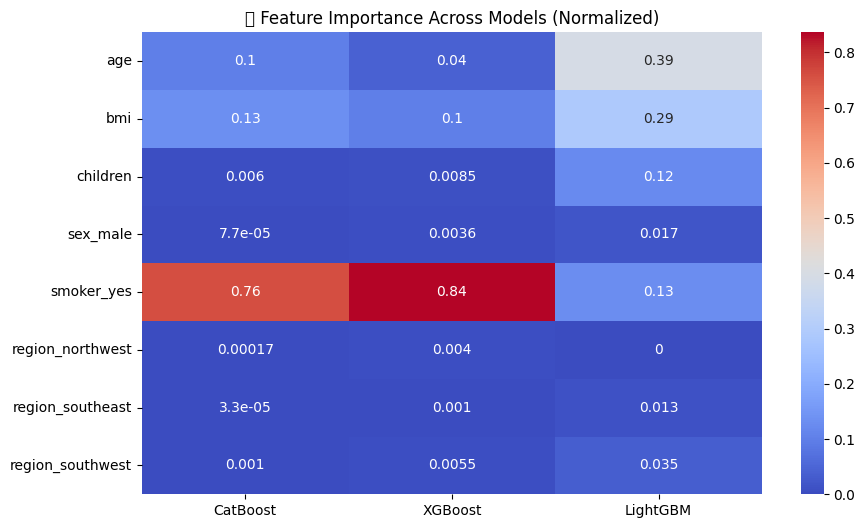

In [41]:
# 📌 Recalculate feature importance for tuned models
feature_importance = pd.DataFrame(index=X.columns)

# 🔄 Extract feature importances again after tuning
for name, model in tuned_models.items():
    if hasattr(model, "feature_importances_"):
        feature_importance[name] = model.feature_importances_

# 🔥 Normalize Feature Importance
feature_importance = feature_importance / feature_importance.sum()

# 📊 Re-plot Feature Importance Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(feature_importance, annot=True, cmap="coolwarm")
plt.title("🔥 Feature Importance Across Models (Normalized)")
plt.show()

# 🎯 SHAP Analysis for CatBoost (Explainability)

In [42]:
# 🎯 SHAP Analysis for CatBoost (Explainability)
explainer = shap.Explainer(models["CatBoost"])  # Create SHAP explainer for CatBoost
shap_values = explainer(X_test)  # Compute SHAP values

# 🔍 SHAP Summary Plot (Feature impact analysis)

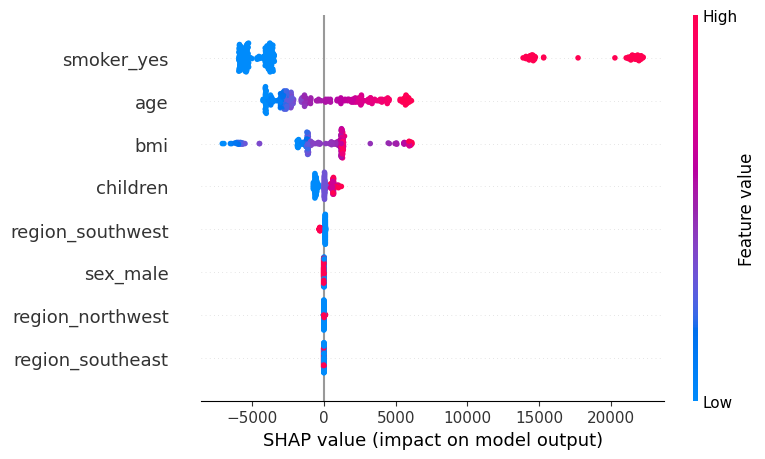

In [43]:
# 🔍 SHAP Summary Plot (Feature impact analysis)
shap.summary_plot(shap_values, X_test)

# 🔗 Feature Correlation Analysis

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


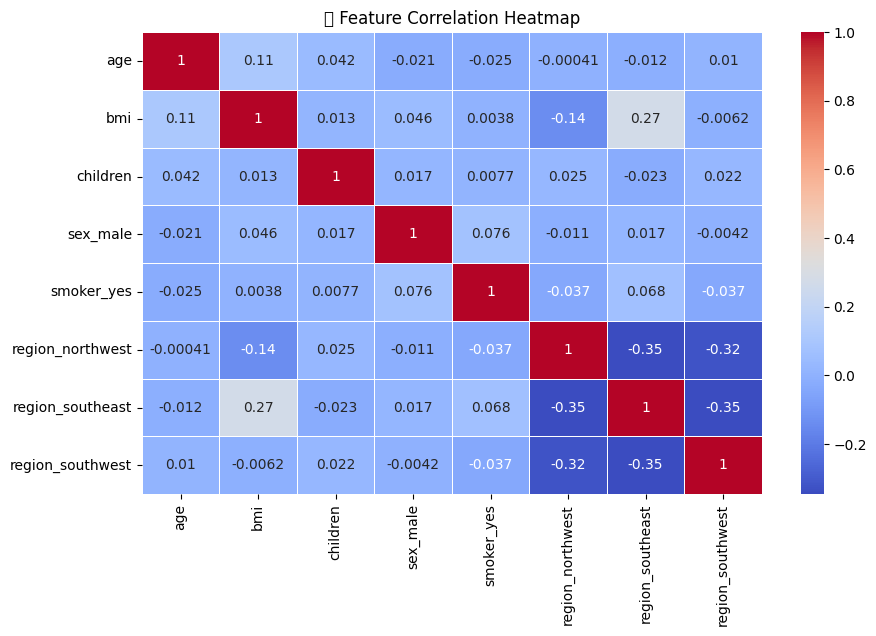

In [34]:
# 🔗 Feature Correlation Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("🔗 Feature Correlation Heatmap")
plt.show()

# 📊 Residual Distribution (Errors of Models)

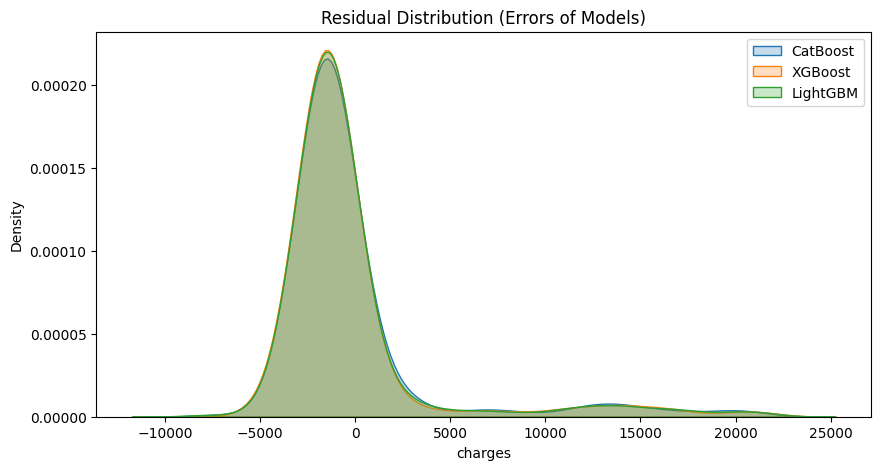

In [35]:
# 📊 Residual Distribution (Errors of Models)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

for name, model in models.items():
    y_pred = model.predict(X_test)
    errors = y_test - y_pred  # Compute residuals
    sns.kdeplot(errors, label=name, fill=True)

plt.title("Residual Distribution (Errors of Models)")
plt.legend()
plt.show()